## Problem Statement

### Context

We are using https://archive.ics.uci.edu/dataset/222/bank+marketing as our source. 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### Objective

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Data Dictionary
| Variable Name | Role   | Type        | Demographic     | Description | Units | Missing Values |
|---------------|--------|-------------|------------------|-------------|--------|-----------------|
| age           | Feature| Integer     | Age              |             |        | no              |
| job           | Feature| Categorical | Occupation       | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |        | no              |
| marital       | Feature| Categorical | Marital Status   | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |        | no              |
| education     | Feature| Categorical | Education Level  | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |        | no              |
| default       | Feature| Binary      |                  | has credit in default? |        | no              |
| balance       | Feature| Integer     |                  | average yearly balance | euros  | no              |
| housing       | Feature| Binary      |                  | has housing loan? |        | no              |
| loan          | Feature| Binary      |                  | has personal loan? |        | no              |
| contact       | Feature| Categorical |                  | contact communication type (categorical: 'cellular','telephone') |        | yes             |
| day_of_week   | Feature| Date        |                  | last contact day of the week |        | no              |
| month         | Feature| Date        |                  | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |        | no              |
| duration      | Feature| Integer     |                  | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |        | no              |
| campaign      | Feature| Integer     |                  | number of contacts performed during this campaign and for this client (numeric, includes last contact) |        | no              |
| pdays         | Feature| Integer     |                  | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |        | yes             |
| previous      | Feature| Integer     |                  | number of contacts performed before this campaign and for this client |        | no              |
| poutcome      | Feature| Categorical |                  | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |        | yes             |
| y             | Target | Binary      |                  | has the client subscribed a term deposit? |        | no              |


In [274]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import random

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import random
from scipy.stats import gaussian_kde

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

## Loading the dataset

In [275]:
#Load data from Google drive
bank_data = pd.read_csv('bank-full.csv', sep=';', quotechar='"')

#Copy the bank_Data into a new dataframe to preserve the original copy
data = bank_data.copy()

## Data Overview

* Observations
* Sanity checks

In [276]:
#Find total row and column count
data.shape

(45211, 17)

In [277]:
#Review the first 5 rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [278]:
#Check data types of column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    44935 non-null  object 
 3   education  45209 non-null  object 
 4   default    45208 non-null  object 
 5   balance    45210 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45191 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [279]:
# review the data distribution
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45210.0,1362.299978,3044.793716,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [280]:
# check for null values
data.isnull().sum()

age            0
job            0
marital      276
education      2
default        3
balance        1
housing        0
loan           0
contact       22
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome      20
y              0
dtype: int64

In [281]:
# Calculate the percentage of customer with housing loan, Personal loan
customer_with_housing_loan = round((data[(data['housing'] == 'yes')].shape[0]/data.shape[0])*100)
customer_with_personal_loan=  round((data[(data['loan'] == 'yes')].shape[0]/data.shape[0])*100)
print(customer_with_housing_loan, customer_with_personal_loan)

56 16


In [282]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [283]:
# Validate unique values in the categorical columns
categorical_columns = ['job'	,'marital'	,'education', 'default'	,'housing',	'loan'	,'contact'	,'month',	'poutcome']
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital: ['married' 'single' 'divorced' nan]
Unique values in education: ['tertiary' 'secondary' 'unknown' 'primary' nan]
Unique values in default: ['no' 'yes' nan]
Unique values in housing: ['yes' 'no']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['unknown' nan 'cellular' 'telephone']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome: ['unknown' nan 'failure' 'other' 'success']


  ### Highlevel Observation:
Below are the overall overservation from the data set:
  *   Data set has 17 columns and 45211 rows
  *   Few null data found
  *   No duplicate record found
  *   'balance' and 'pdays' columns has some negative data indicating data entry error which will need cleanup.
  * 'job'	,'marital'	,'education'	,'housing',	'loan'	,'contact'	,'month',	'poutcome' apprears to be Catergorical data
  * 'y' column is the dependent variable. We will predict the same using Decision Tree ML model.
  * Average Age of the customer is around 40 years. With 75% customer having age 48 or less
  * Average Balance amount is around 1362 with highest being 102127
  * 56% customer has home loan
  * 16% customer have personal loan



## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [284]:
# missing value treatment
data['balance'].fillna(data['balance'].median(), inplace=True)
data['marital'].fillna(data['marital'].mode()[0], inplace=True)
data['contact'].fillna(data['contact'].mode()[0], inplace=True)
data['poutcome'].fillna(data['poutcome'].mode()[0], inplace=True)
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['default'].fillna(data['default'].mode()[0], inplace=True)

In [285]:
# verify no missing value after cleanup 
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [286]:
def detect_outliers_iqr(df):
    outliers = {}
    outlier_percentages = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Consider only numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = np.where((df[col] < lower_bound) | (df[col] > upper_bound))[0]
        outliers[col] = outlier_indices

        # Calculate outlier percentage
        outlier_percentage = (len(outlier_indices) / len(df)) * 100
        outlier_percentages[col] = outlier_percentage

    return outliers, outlier_percentages

# Detect outliers using IQR method and calculate percentages
iqr_outliers, outlier_percentages = detect_outliers_iqr(data)

# Print outlier percentages for each column
for col, percentage in outlier_percentages.items():
    if percentage > 0:
        print(f"Outlier percentage for {col}: {percentage:.2f}%")

print('\n\nOutliers will not be treated since they are valid.')

Outlier percentage for age: 1.08%
Outlier percentage for balance: 10.46%
Outlier percentage for duration: 7.16%
Outlier percentage for campaign: 6.78%
Outlier percentage for pdays: 18.26%
Outlier percentage for previous: 18.26%


Outliers will not be treated since they are valid.


In [287]:
# Impute negative balance
# Compute the median once
median_balance = data['balance'].median()

# Replace negative values with the median
data.loc[data['balance'] < 0, 'balance'] = median_balance

# Convert to integer type (if needed)
data['balance'] = data['balance'].astype(int)


In [288]:
# dropping duration since its going to impact the model
data.drop(columns='duration', inplace=True)

In [289]:
# Convert Binary columns in numeric
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})

## Exploratory Data Analysis.

  ### Univariate Data Analysis

In [290]:
# User defined function to generate various charts for data analysis
def generate_histogram(data_column):
    # Generate three random colors for the gradient
    colors = [(random.random(), random.random(), random.random()) for _ in range(3)]
    cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=256)

    # Plot the histogram
    plt.figure(figsize=(6, 4))
    n, bins, patches = plt.hist(
        data_column,
        bins=30,
        density=True,
        edgecolor=None,
        alpha=0.75,
        rwidth=1
    )

    # Apply the color gradient to the histogram bars
    for i in range(len(patches)):
        patches[i].set_facecolor(cmap(i / len(patches)))

    # Compute and plot the KDE
    kde = gaussian_kde(data_column)
    x_vals = np.linspace(min(data_column), max(data_column), 1000)
    kde_vals = kde(x_vals)
    plt.plot(x_vals, kde_vals, color='green', linewidth=2, alpha=0.5,label='KDE')

    # Add labels and title
    plt.xlabel(data_column.name)
    plt.ylabel('Count')
    plt.legend()
    plt.grid(False)

    plt.show()

def generate_boxplot(column_data):
    # Generate a random color in hexadecimal format
    random_color = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])

    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create the boxplot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=column_data, color=random_color)

    # Add title and labels
    plt.title(f"Boxplot of {column_data.name}", fontsize=16)
    plt.xlabel(column_data.name, fontsize=14)
    plt.grid(False)
    # Show the plot
    plt.show()

def generate_barplot(data_column, title='Bar Plot'):

    # Count occurrences
    counts = data_column.value_counts()

    # Calculate percentages
    percentages = counts / counts.sum() * 100

    # Generate random colors
    colors = np.random.rand(len(counts), 3)

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index, counts.values, color=colors, width=0.4)

    # Add percentage labels on top of each bar
    for bar, percentage in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.grid(False)
    plt.xlabel(data_column.name if data_column.name else 'Category')
    plt.ylabel('Count')
    plt.show()

def generate_count_plot(data_column, x, hue=None, title='Count Plot with Random Colors'):

    # Get unique categories for x and hue columns
    unique_categories = data_column[hue].unique()

    # Generate random hexadecimal colors
    random_colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(len(unique_categories))]

    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=data_column, x=x, hue=hue, palette=random_colors)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.grid(False)
    for container in ax.containers:
      ax.bar_label(container)
    plt.show()

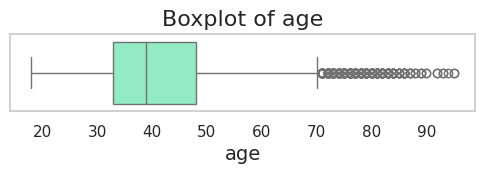

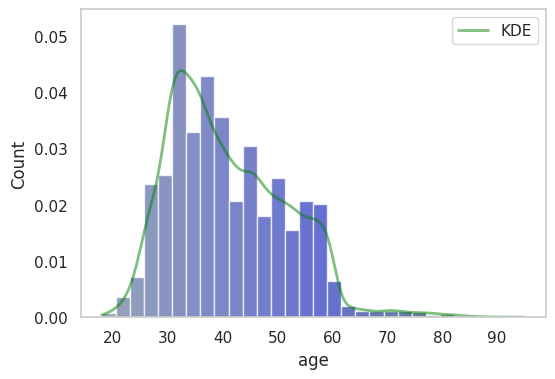

In [291]:
generate_boxplot(data['age'])
generate_histogram(data['age'])

  #### 'age' Observation:
age has no outlier and data distribution is normal

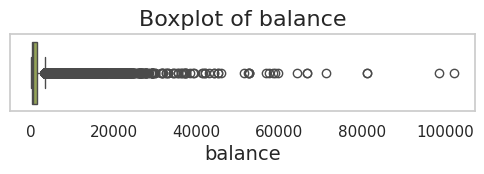

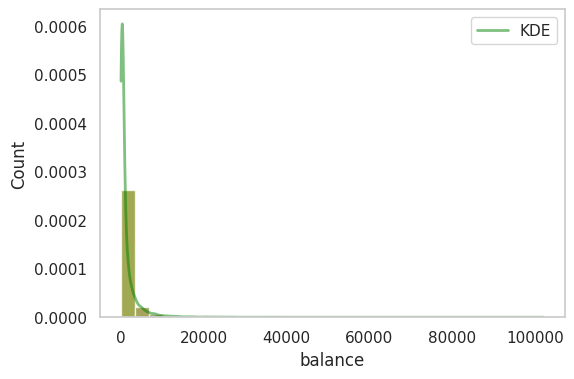

In [292]:
generate_boxplot(data['balance'])
generate_histogram(data['balance'])

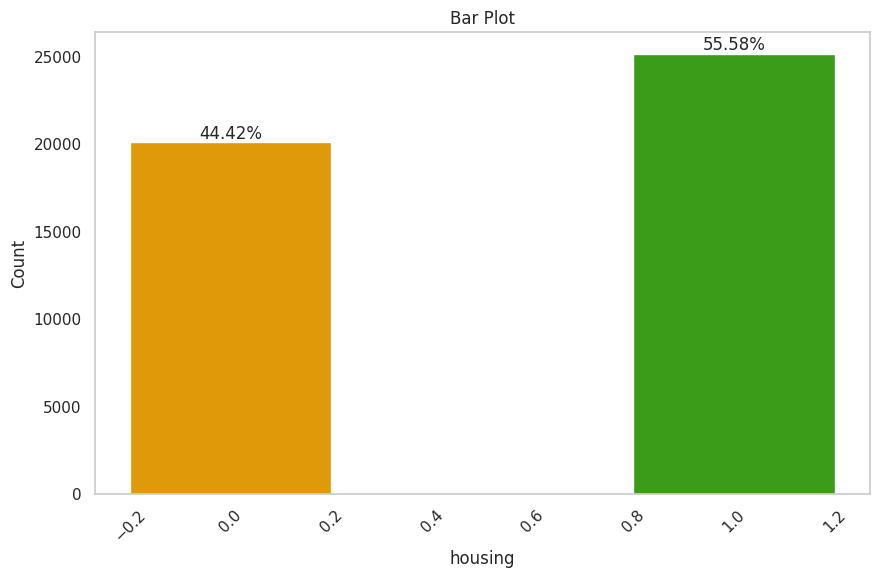

In [293]:
# Generate barplot for customer with home loan
generate_barplot(data['housing'])

  #### 'housing' Observation:
* close to 56 % customer has home loan

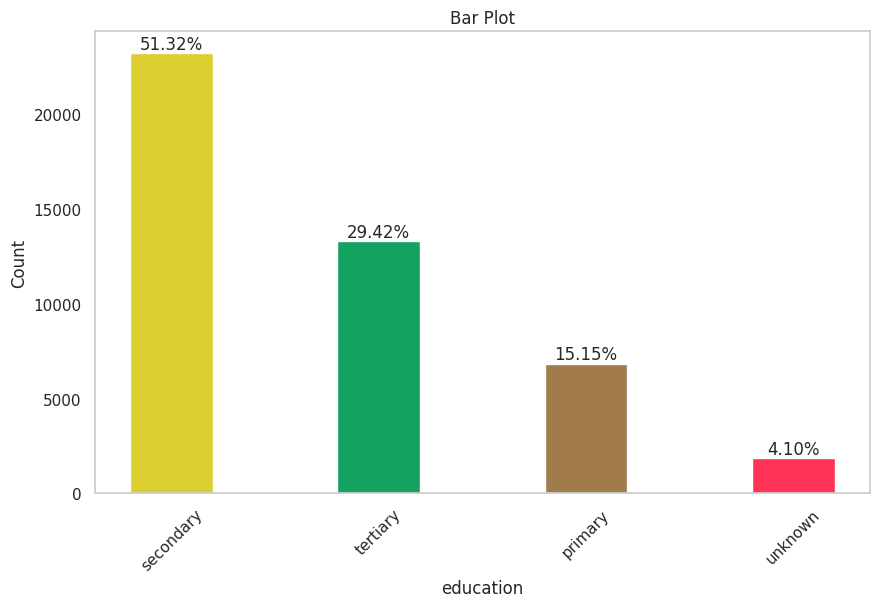

In [294]:
generate_barplot(data['education'])

  #### 'education' Observation:
 * Majority of customer 51% has secodary education.


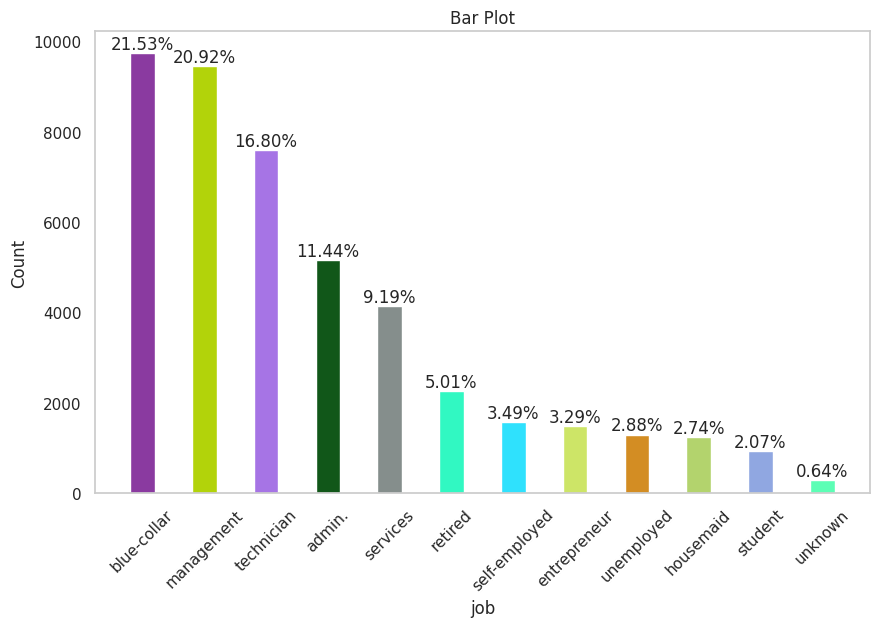

In [295]:
generate_barplot(data['job'])

  #### 'job' observation :
 * 21 % customer works in blue collar job. While 20% in mangement, 16 % as technician and 9% as services


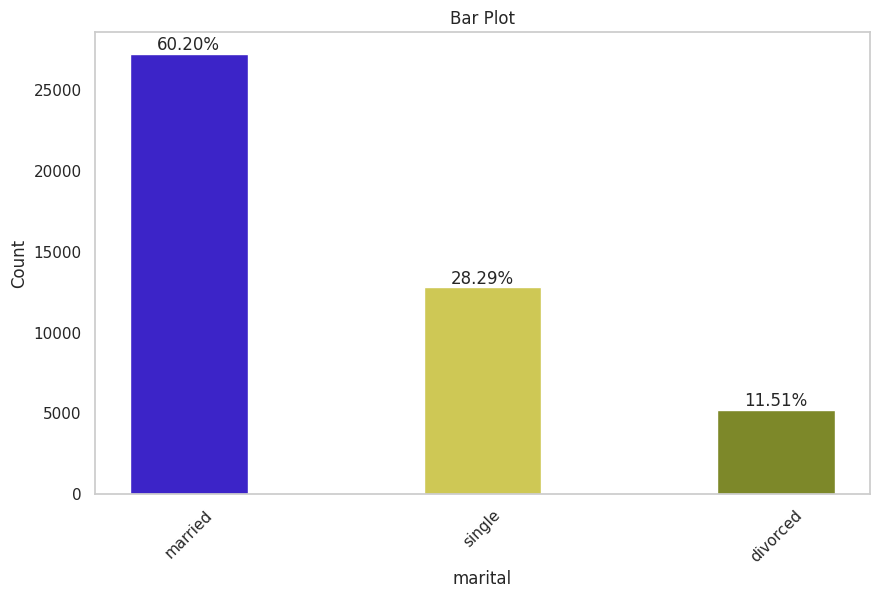

In [296]:
generate_barplot(data['marital'])

#### 'marital' Observation
* Almost 60% customers are married

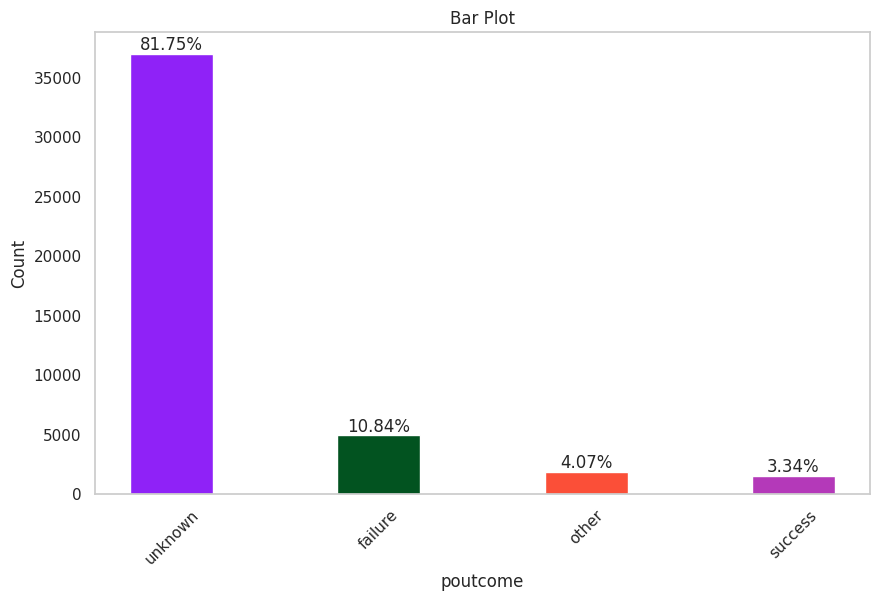

In [297]:
generate_barplot(data['poutcome'])

#### 'poutcome' Observation
* 3.34% customer signed up for Term deposit last time 

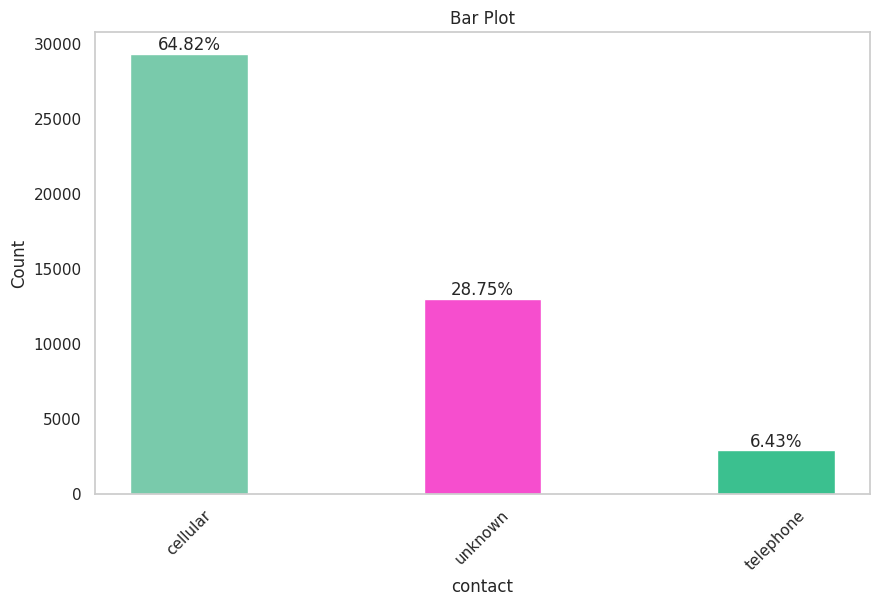

In [298]:
generate_barplot(data['contact'])

#### 'contact' Observation
* 64% customer have cellular phone number

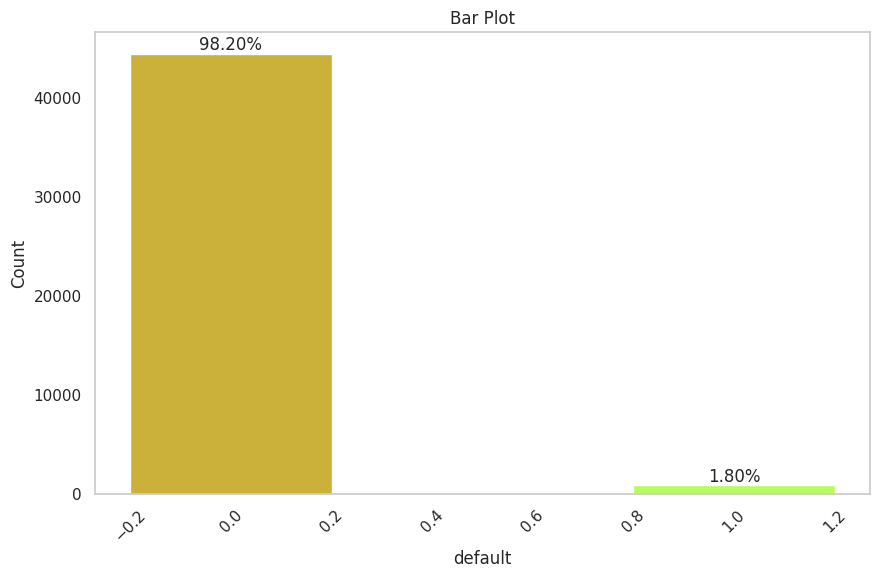

In [299]:
generate_barplot(data['default'])

#### 'default' Observation
* 1.80% customer have credit default

  ### Multivariate Analysis

  #### Correlation Heatmap

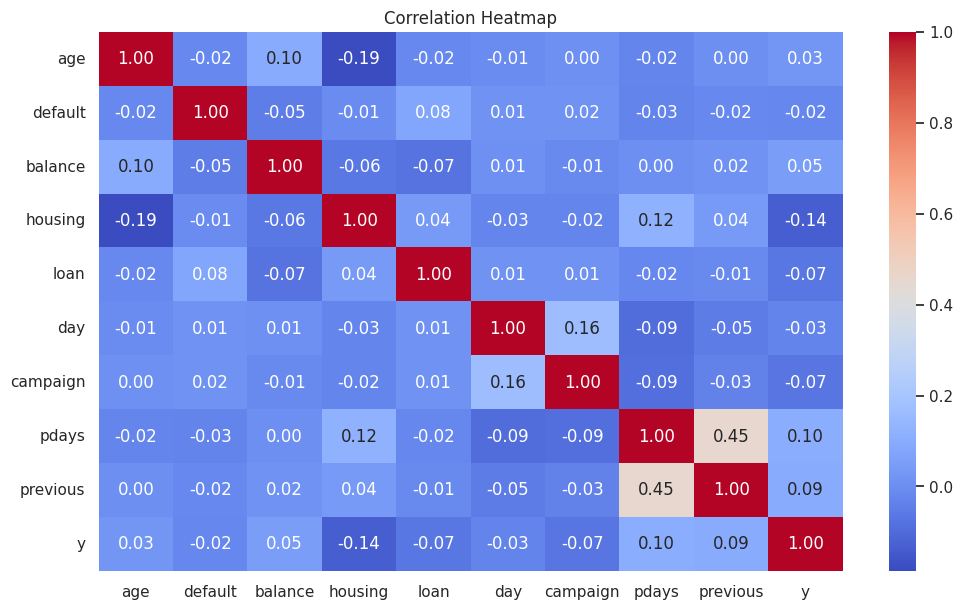

In [300]:
# Correlation Heatmap
cols_list= data.select_dtypes(include=np.number).columns.tolist()
corr_matrix = data[cols_list].corr()
# Plotting the correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

#### 'default' Observation
* Small positive correlation beween y with pdays
* Small negative correlation between y with housing

   #### Countplot

##### Education vs Term deposit

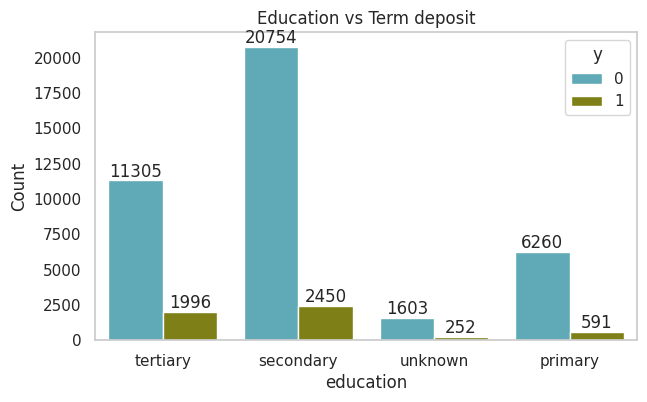

Observation: Customer with tertiary education has higher term deposit acceptance. 



In [301]:
generate_count_plot(data, x='education', hue='y', title='Education vs Term deposit')
print('Observation: Customer with tertiary education has higher term deposit acceptance. \n')



##### Marital vs Term deposit

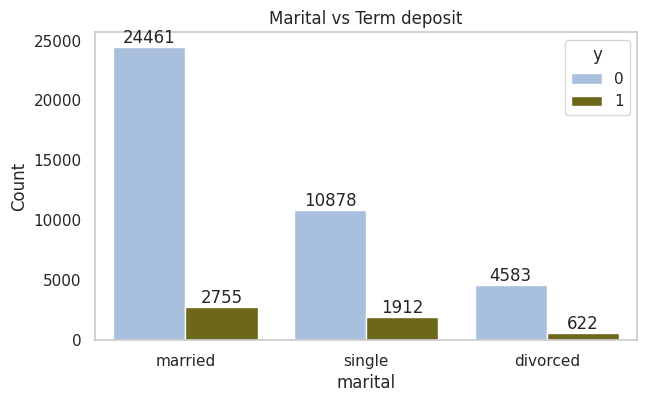

Observation: Single Customer has higher term deposit acceptance. 



In [302]:
generate_count_plot(data, x='marital', hue='y', title='Marital vs Term deposit')
print('Observation: Single Customer has higher term deposit acceptance. \n')

##### Age vs Term deposit

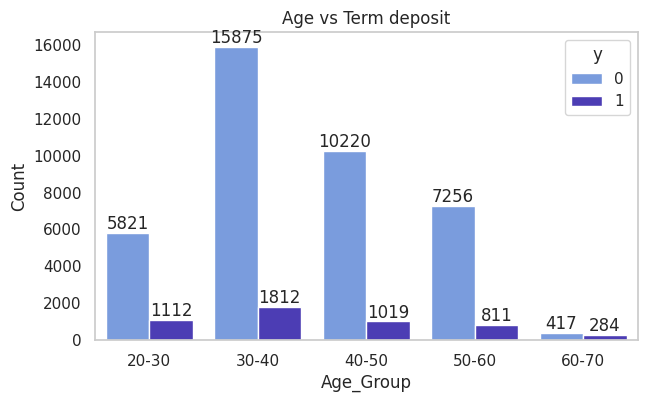

Observation: Younger age group betwern 20-30 and eldest age group 60-70 had higher term deposit acceptance.  



In [303]:
data['Age_Group'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

generate_count_plot(data, x='Age_Group', hue='y', title='Age vs Term deposit')
print('Observation: Younger age group betwern 20-30 and eldest age group 60-70 had higher term deposit acceptance.  \n')


#####  Personal Loan vs Term Deposit

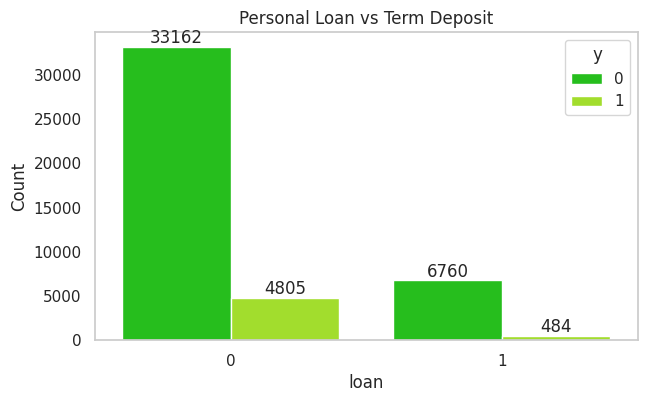

Observation: high percentage of customer having no Personal loan had accepted Term Deposit.  



In [304]:
generate_count_plot(data, x='loan', hue='y', title='Personal Loan vs Term Deposit')
print('Observation: high percentage of customer having no Personal loan had accepted Term Deposit.  \n')

##### home loan vs Term Deposit

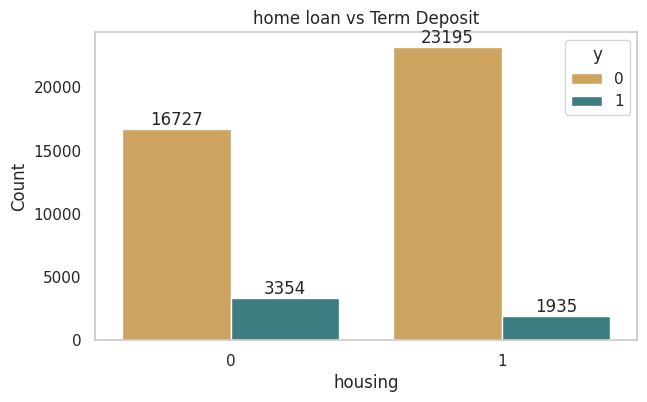

Observation: high percentage of customer having no housing loan had accepted Term Deposit.  



In [305]:
generate_count_plot(data, x='housing', hue='y', title='home loan vs Term Deposit')
print('Observation: high percentage of customer having no housing loan had accepted Term Deposit.  \n')

##### poutcome vs Term Deposit

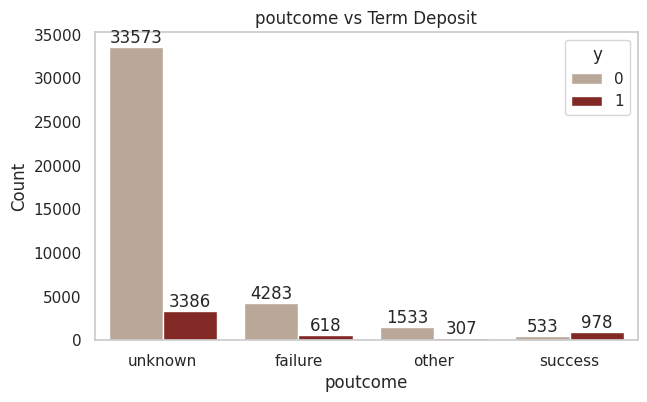

Observation: Plot shows signifincantly higher percentage of customers accepted Term Deposit upon successful campaign  



In [306]:
generate_count_plot(data, x='poutcome', hue='y', title='poutcome vs Term Deposit')
print('Observation: Plot shows signifincantly higher percentage of customers accepted Term Deposit upon successful campaign  \n')

In [307]:
data.drop(columns='Age_Group', inplace=True)

## Model Building

###User Defined function

In [308]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

def show_feature_importance(importances, indices, feature_names):
  '''
  Description: Function to plot the features in the order of importance
  Parameters:
    importances: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    indices: numpy.ndarray, required
      The indices of array
    feature_names: list, required
      The column names of features
  '''
  plt.figure(figsize = (11.75, 8))
  plt.title('Feature Importances', fontsize = 11)
  plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a customer will accept Term Deposit but in reality, the customer will not (FP)
- Predicting a customer will not Term Deposit but in reality, the customer will accept (FN)

**Which case is more important?**

- Missing out on a customer who would have accepted a Term Deposit means losing potential business and valuable source of funding.
- It's more damaging to the campaign because the bank loses an opportunity to convert an interested customer.

**How to reduce the losses?**

Since missing potential  customers is more critical than approaching uninterested ones, the model evaluation will prioritize Recall over other metrics.

### Model Building

In [309]:
# Convert catergorical variable into dummy variables
data = pd.get_dummies(data, drop_first=True)

In [310]:
data.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [311]:
# Split data for training and testing the model
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Default

In [312]:
model_no_tune = DecisionTreeClassifier(criterion="gini", random_state=42)
model_no_tune.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### Model performance with training set

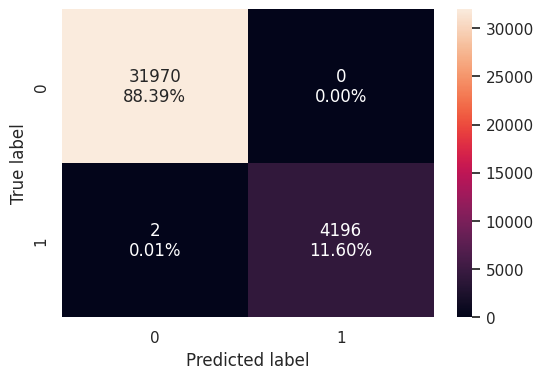

In [313]:
confusion_matrix_sklearn(model_no_tune, X_train, y_train)

In [314]:
decision_tree_training_performance = model_performance_classification_sklearn(model_no_tune, X_train, y_train)
print(decision_tree_training_performance)

   Accuracy    Recall  Precision        F1
0  0.999945  0.999524        1.0  0.999762


#### Model performance with Test set

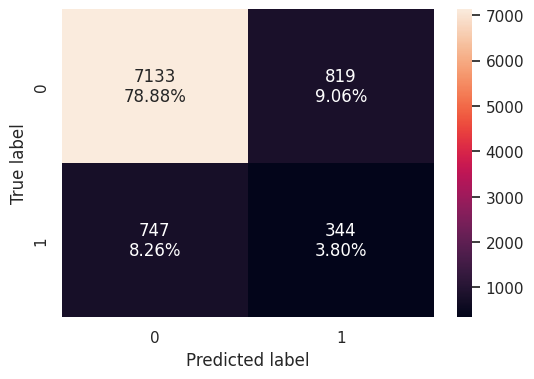

In [315]:
# checking performance on Test
confusion_matrix_sklearn(model_no_tune, X_test, y_test)

In [316]:
decision_tree_test_performance = model_performance_classification_sklearn(model_no_tune, X_test, y_test)
print(decision_tree_test_performance)

   Accuracy    Recall  Precision        F1
0  0.826827  0.315307   0.295787  0.305235


#### Observation
* The accuracy, recall, precision and F1 score has a value close to 1.0 or 1.0 for the training set which means  model is overfitting
* Test scores are significantly lower than the training scores, which means Model is overfitted

### Decision Tree (with class_weights)
* We will set class_weight = "balanced" to ensure Model adjust the weights to be inversely proportional to the class frequencies in the input data.

In [317]:
model_class_weight = DecisionTreeClassifier(criterion="gini", random_state=42, class_weight="balanced")
model_class_weight.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

#### Model performance with training set

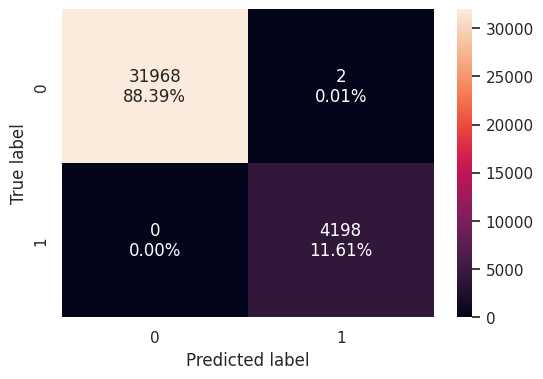

In [318]:
confusion_matrix_sklearn(model_class_weight, X_train, y_train)

In [319]:
decision_tree_training_performance_class_weight = model_performance_classification_sklearn(model_class_weight, X_train, y_train)
print(decision_tree_training_performance_class_weight)

   Accuracy  Recall  Precision        F1
0  0.999945     1.0   0.999524  0.999762


#### Model performance with Test set

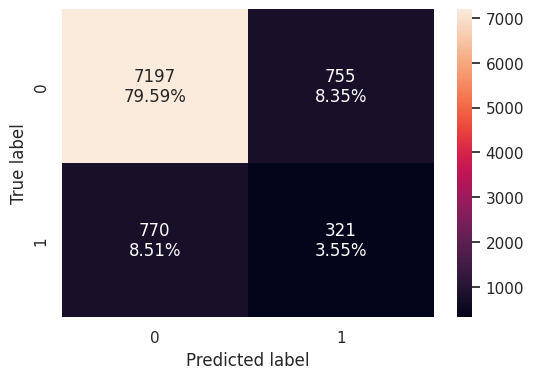

In [320]:
confusion_matrix_sklearn(model_class_weight, X_test, y_test)

In [321]:
decision_tree_test_performance_class_weight = model_performance_classification_sklearn(model_class_weight, X_test, y_test)
print(decision_tree_test_performance_class_weight)

   Accuracy    Recall  Precision        F1
0  0.831361  0.294225   0.298327  0.296262


#### Show Feature Importance

In [322]:
feature_names = list(X_test.columns)
feature_names

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [323]:
# Importance of features in the tree building
importances_weight_class = model_class_weight.feature_importances_
indices_weight_class = np.argsort(importances_weight_class)

importances_weight_class

array([0.13753469, 0.00369856, 0.19799534, 0.02403406, 0.01495165,
       0.12347377, 0.06355315, 0.04301974, 0.01320838, 0.01512408,
       0.00579897, 0.00427087, 0.00938232, 0.00430286, 0.0070437 ,
       0.01251015, 0.00250641, 0.01634805, 0.00461501, 0.00095682,
       0.01180159, 0.00754679, 0.01313812, 0.01574613, 0.00498587,
       0.00764731, 0.05041742, 0.01588672, 0.00200599, 0.00818924,
       0.00873253, 0.01806288, 0.00590961, 0.00533487, 0.00886858,
       0.01387304, 0.00602736, 0.00313291, 0.00294903, 0.08207019,
       0.00334524])

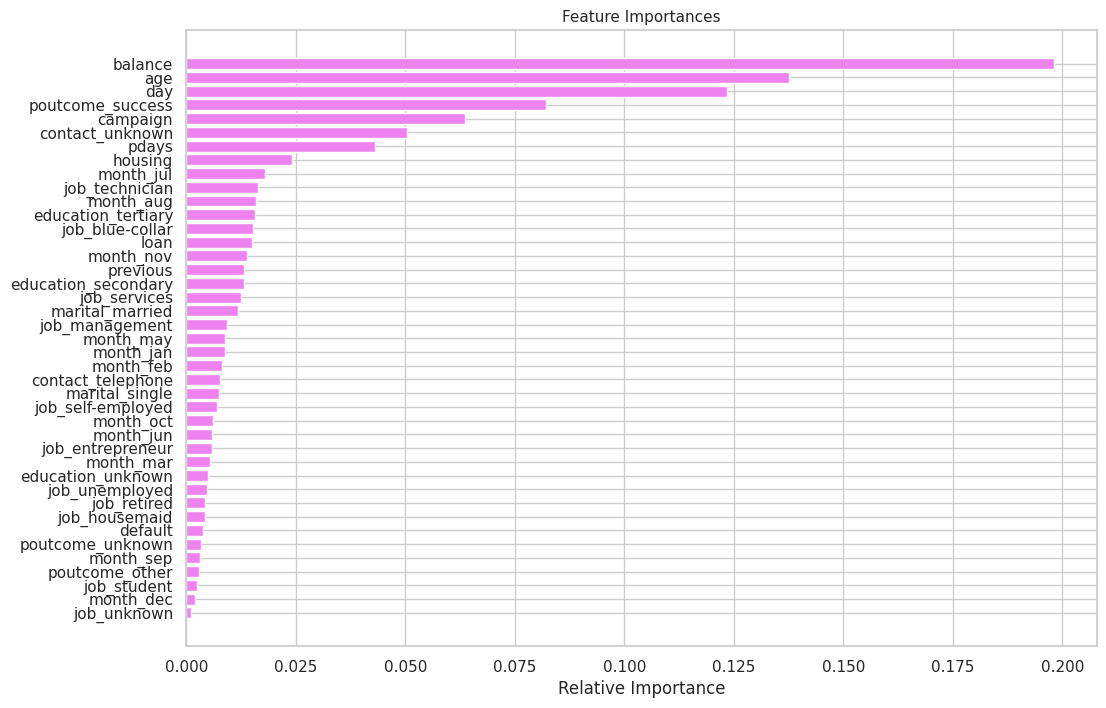

In [324]:
show_feature_importance(importances = importances_weight_class, indices = indices_weight_class, feature_names = feature_names)

#### Observation
* With class_wegiht set to Balanced, the accuracy, recall, precision and F1 score has a value of 1.0 for the training set which means  model is still overfitting
* Big disparity in performance of model on training set and test set indicating overfitting.

### Decision Tree (Pre-pruning)
* We will leverage GridSearchCV tuning technique to compute the optimum values of Hyperparameters.

In [325]:
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()
# Define the parameter grid for pre-pruning
param_grid = {
    'criterion': ['entropy', 'gini'],  # fine
    'class_weight': ['balanced', {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}, {0: 0.3, 1: 0.7},{0: 0.1, 1: 0.9},],  # more weight options
    'max_depth': np.arange(5, 18, 2),  # allow deeper trees (less bias)
    'min_samples_leaf': [1, 2, 3, 5],  # smaller = more sensitive to positive class
    'max_leaf_nodes': [10, 20, 30, 50, None],  # allow more complexity
    'min_impurity_decrease': [0.0001, 0.001],  # allow more splits
}

# Initialize GridSearchCV with cross-validation and recall as the scoring metric
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1,
                           scoring=make_scorer(recall_score))

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

# Train the decision tree with the best parameters
model_pre_prune = grid_search.best_estimator_


Fitting 5 folds for each of 2800 candidates, totalling 14000 fits
Best Parameters: {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 50, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1}
Best Recall Score: 0.6931851977978318


#### Model performance with training set

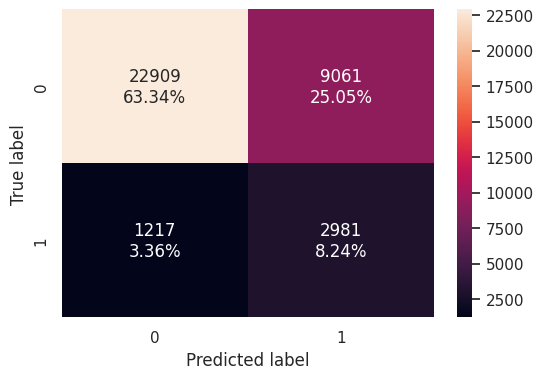

In [326]:
confusion_matrix_sklearn(model_pre_prune, X_train, y_train)

In [327]:
decision_tree_training_performance_pre_prune = model_performance_classification_sklearn(model_pre_prune, X_train, y_train)
print(decision_tree_training_performance_pre_prune)

   Accuracy  Recall  Precision        F1
0  0.715826  0.7101    0.24755  0.367118


#### Model performance with Test set

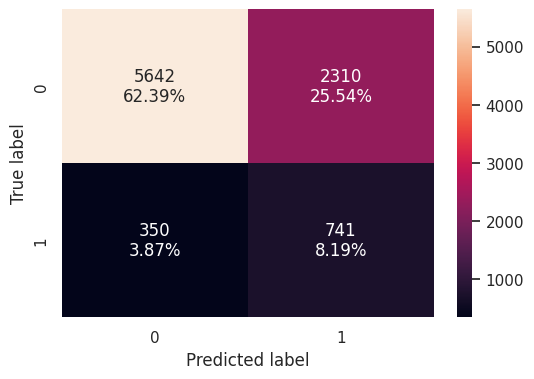

In [328]:
confusion_matrix_sklearn(model_pre_prune, X_test, y_test)

In [329]:
decision_tree_test_performance_pre_prune = model_performance_classification_sklearn(model_pre_prune, X_test, y_test)
print(decision_tree_test_performance_pre_prune)

   Accuracy    Recall  Precision        F1
0   0.70585  0.679193   0.242871  0.357798


#### Visualize Tree

['age', 'default', 'balance', 'housing', 'loan', 'day', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


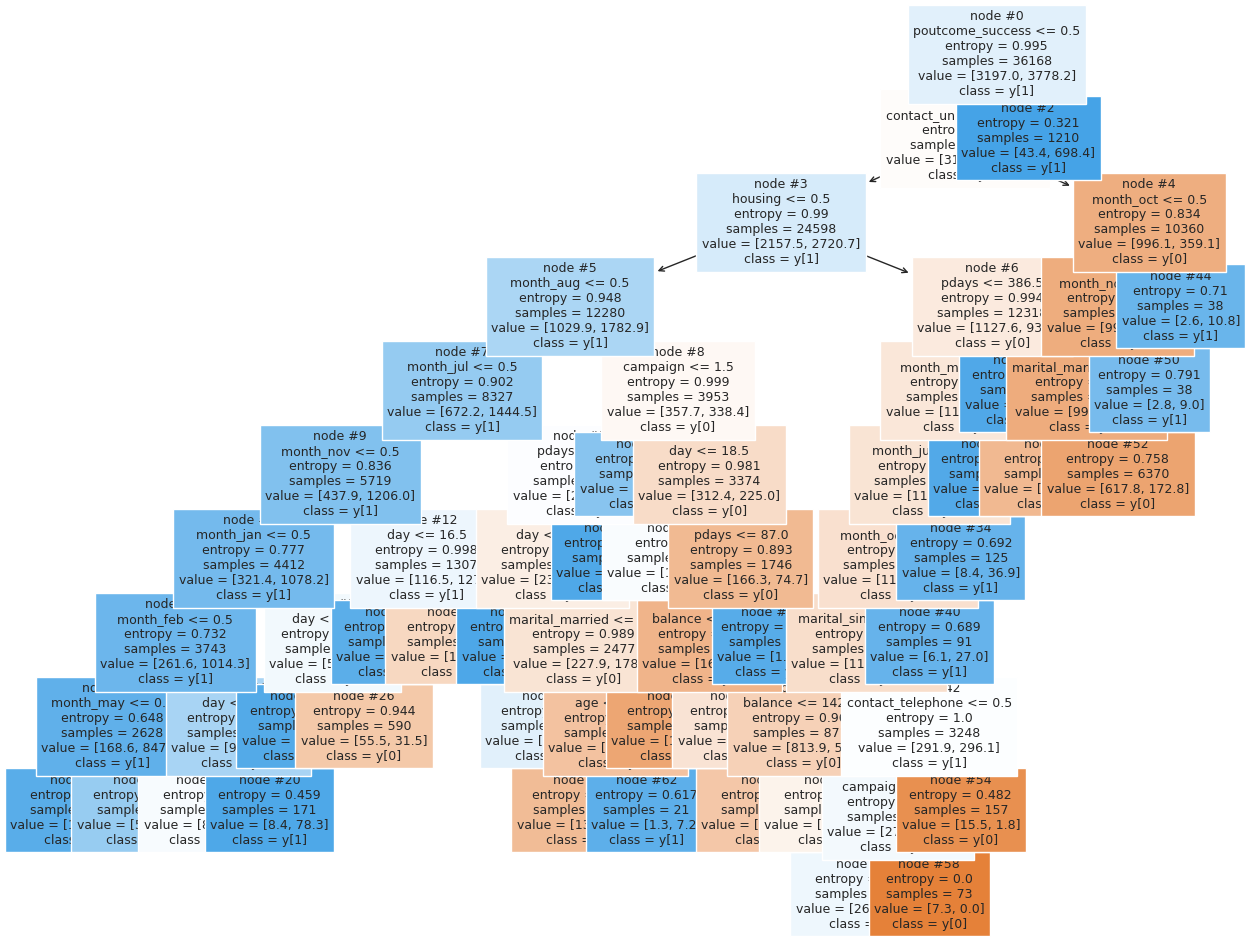

In [330]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

plt.figure(figsize=(15, 12))

tree.plot_tree(
    model_pre_prune,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [332]:
print(tree.export_text(model_pre_prune, feature_names=feature_names,show_weights=True))

|--- poutcome_success <= 0.50
|   |--- contact_unknown <= 0.50
|   |   |--- housing <= 0.50
|   |   |   |--- month_aug <= 0.50
|   |   |   |   |--- month_jul <= 0.50
|   |   |   |   |   |--- month_nov <= 0.50
|   |   |   |   |   |   |--- month_jan <= 0.50
|   |   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |   |--- month_may <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [118.00, 741.60] class: 1
|   |   |   |   |   |   |   |   |--- month_may >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [50.60, 106.20] class: 1
|   |   |   |   |   |   |   |--- month_feb >  0.50
|   |   |   |   |   |   |   |   |--- day <= 9.50
|   |   |   |   |   |   |   |   |   |--- weights: [84.60, 88.20] class: 1
|   |   |   |   |   |   |   |   |--- day >  9.50
|   |   |   |   |   |   |   |   |   |--- weights: [8.40, 78.30] class: 1
|   |   |   |   |   |   |--- month_jan >  0.50
|   |   |   |   |   |   |   |--- day <= 27.50
|   |   |   |   |   |   |   |   |--- weight

#### Show Feature Importance

In [333]:
# Importance of features in the tree building
importances_pre_prune = model_pre_prune.feature_importances_
indices_pre_prune = np.argsort(importances_pre_prune)

importances_pre_prune

array([0.0047873 , 0.        , 0.01214715, 0.0773139 , 0.        ,
       0.07847873, 0.0270081 , 0.03762235, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0147721 , 0.01083616, 0.        , 0.        , 0.        ,
       0.00640924, 0.18584092, 0.04196323, 0.        , 0.02104793,
       0.02098433, 0.04197363, 0.01364309, 0.01485426, 0.01406806,
       0.03579466, 0.01898467, 0.        , 0.        , 0.3214702 ,
       0.        ])

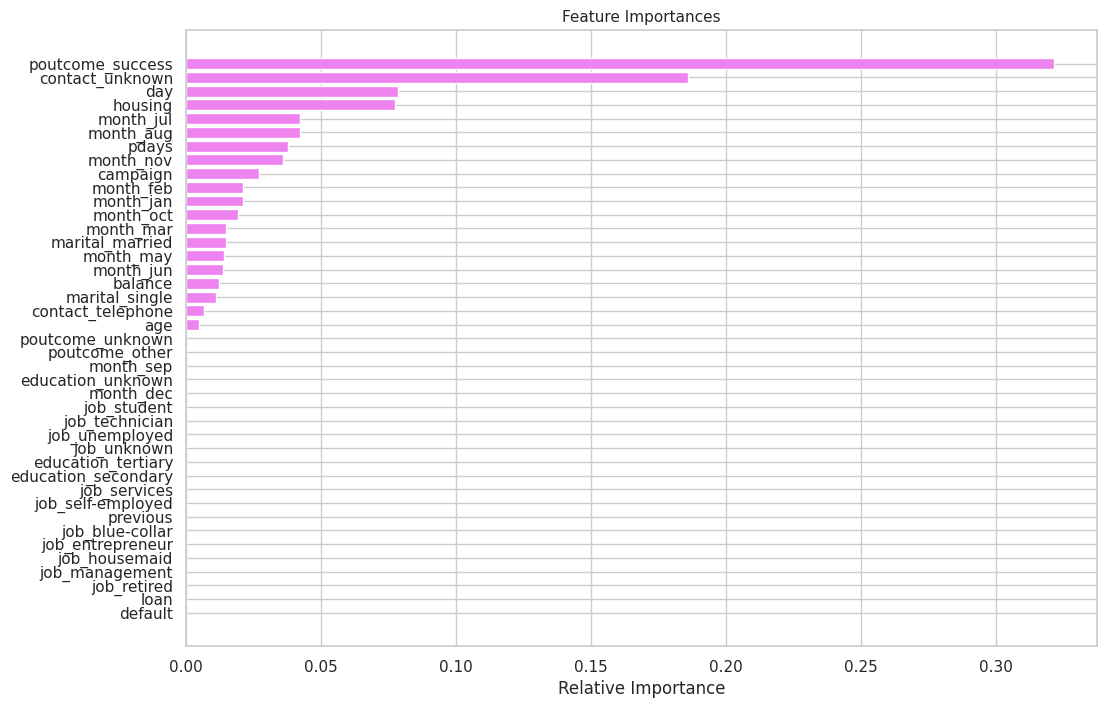

In [334]:
show_feature_importance(importances = importances_pre_prune, indices = indices_pre_prune, feature_names = feature_names)

#### Observation
*  by using the following Hypertuning Parameter we were able to achieve a higher Recall value compared to the original model -   
    - criterion'= ['entropy', 'gini']  
    - class_weight= [{0: 0.20, 1: 0.80}]  
    - max_depth= np.arange(2,15, 2)   
    - min_samples_leaf= [2, 5, 7, 10, 15]  
    - max_leaf_nodes = [2, 3, 5, 10,15]
    - min_impurity_decrease= [0.001,0.01,0.1]  

* Income is the primary feature used to split the data. The first split occurs at Income <= 98.50, indicating that income plays a significant role in determining the class.
*  Classification is also heavily dependent on other factors like credit card spending, education level, presence of a CD account, and mortgage amount.
* The class imbalance in some leaf nodes indicates that the model may be biased toward certain classes in specific scenarios
* In this model Imcome, Education, Family, CC Average are the most important features


### Decision Tree (Post-pruning)

In [335]:
# Determin cost complexity pruning path
clf = DecisionTreeClassifier(random_state=42, class_weight={0: 0.20, 1: 0.80})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

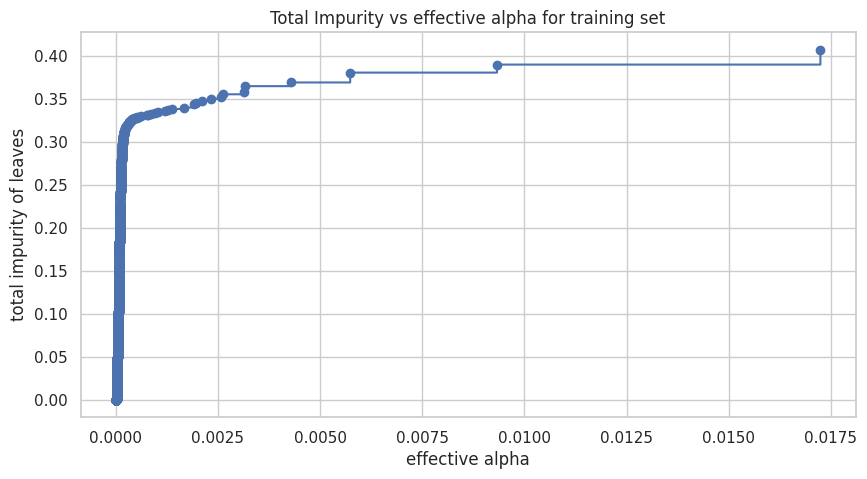

In [336]:
# Plot effective alphas with respect to total impurities
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [356]:
# Generate list of Decision Tree model with post-pruning
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=42, ccp_alpha=ccp_alpha, class_weight={0: 0.10, 1: 0.90}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 7 with ccp_alpha: 0.009329628089489062


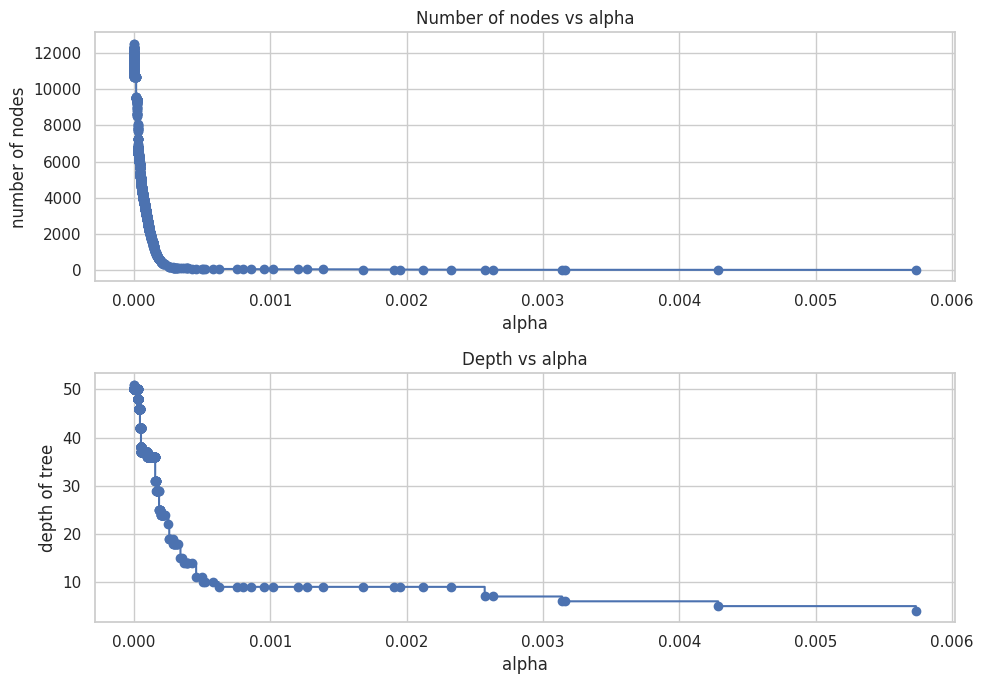

In [357]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Plot number of nodes and tree depth as alpha increases

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [358]:
# List of recall values of training data
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [359]:
# List of recall values of test data
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

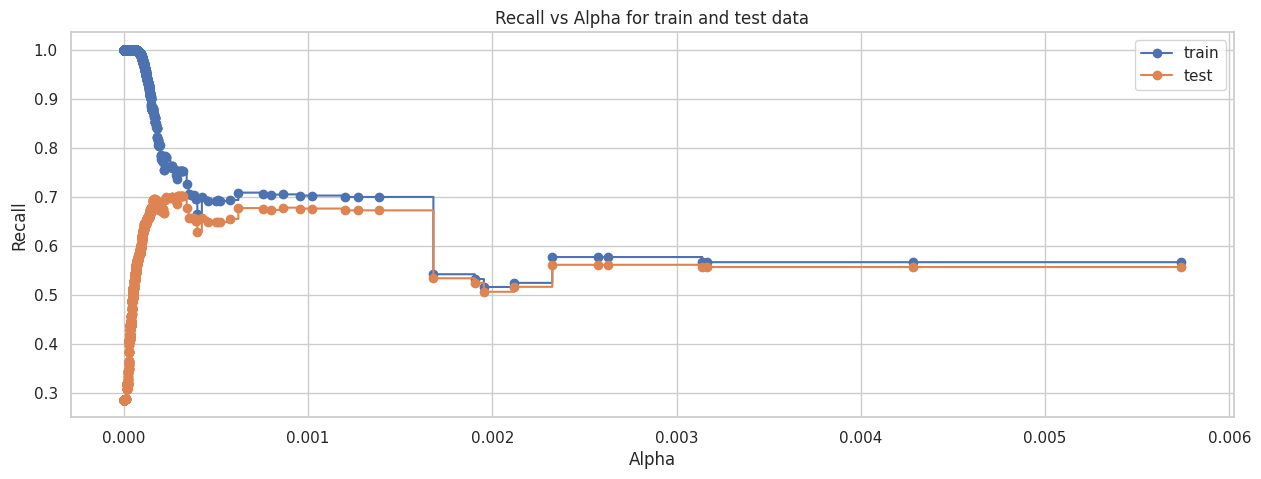

In [360]:
# Display the distribution of Alpha with regards to Recall
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(ccp_alphas, recall_train, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, recall_test, marker = 'o', label = 'test', drawstyle = 'steps-post')

ax.set_title('Recall vs Alpha for train and test data')
ax.set_ylabel('Recall')
ax.set_xlabel('Alpha')
ax.legend()

plt.show()

In [361]:
# Creating model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
model_post_prune = clfs[index_best_model]
print(model_post_prune)

DecisionTreeClassifier(ccp_alpha=0.00030972512459090905,
                       class_weight={0: 0.1, 1: 0.9}, random_state=42)


In [362]:
model_post_prune.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00030972512459090905,
                       class_weight={0: 0.1, 1: 0.9}, random_state=42)

#### Model performance with training set

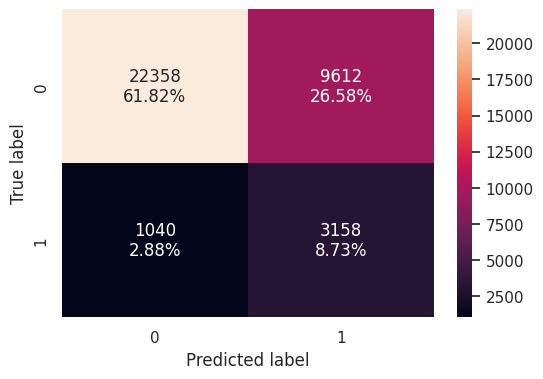

In [363]:
confusion_matrix_sklearn(model_post_prune, X_train, y_train)


In [364]:
decision_tree_training_performance_post_prune = model_performance_classification_sklearn(model_post_prune, X_train, y_train)
decision_tree_training_performance_post_prune

,Accuracy,Recall,Precision,F1
0,0.705486,0.752263,0.247298,0.37223


#### Model performance with Test set

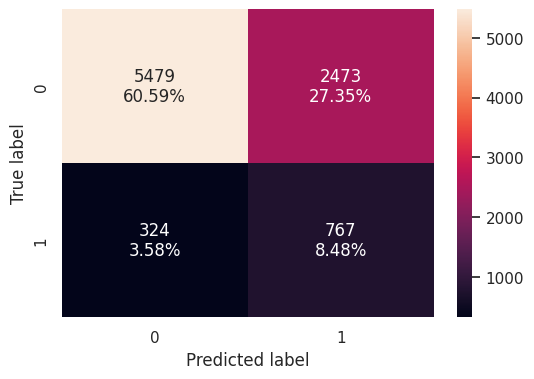

In [365]:
confusion_matrix_sklearn(model_post_prune, X_test, y_test)

In [366]:
decision_tree_test_performance_post_prune = model_performance_classification_sklearn(model_post_prune, X_test, y_test)
decision_tree_test_performance_post_prune

,Accuracy,Recall,Precision,F1
0,0.6907,0.703025,0.236728,0.354191


#### Visualizing post prune tree

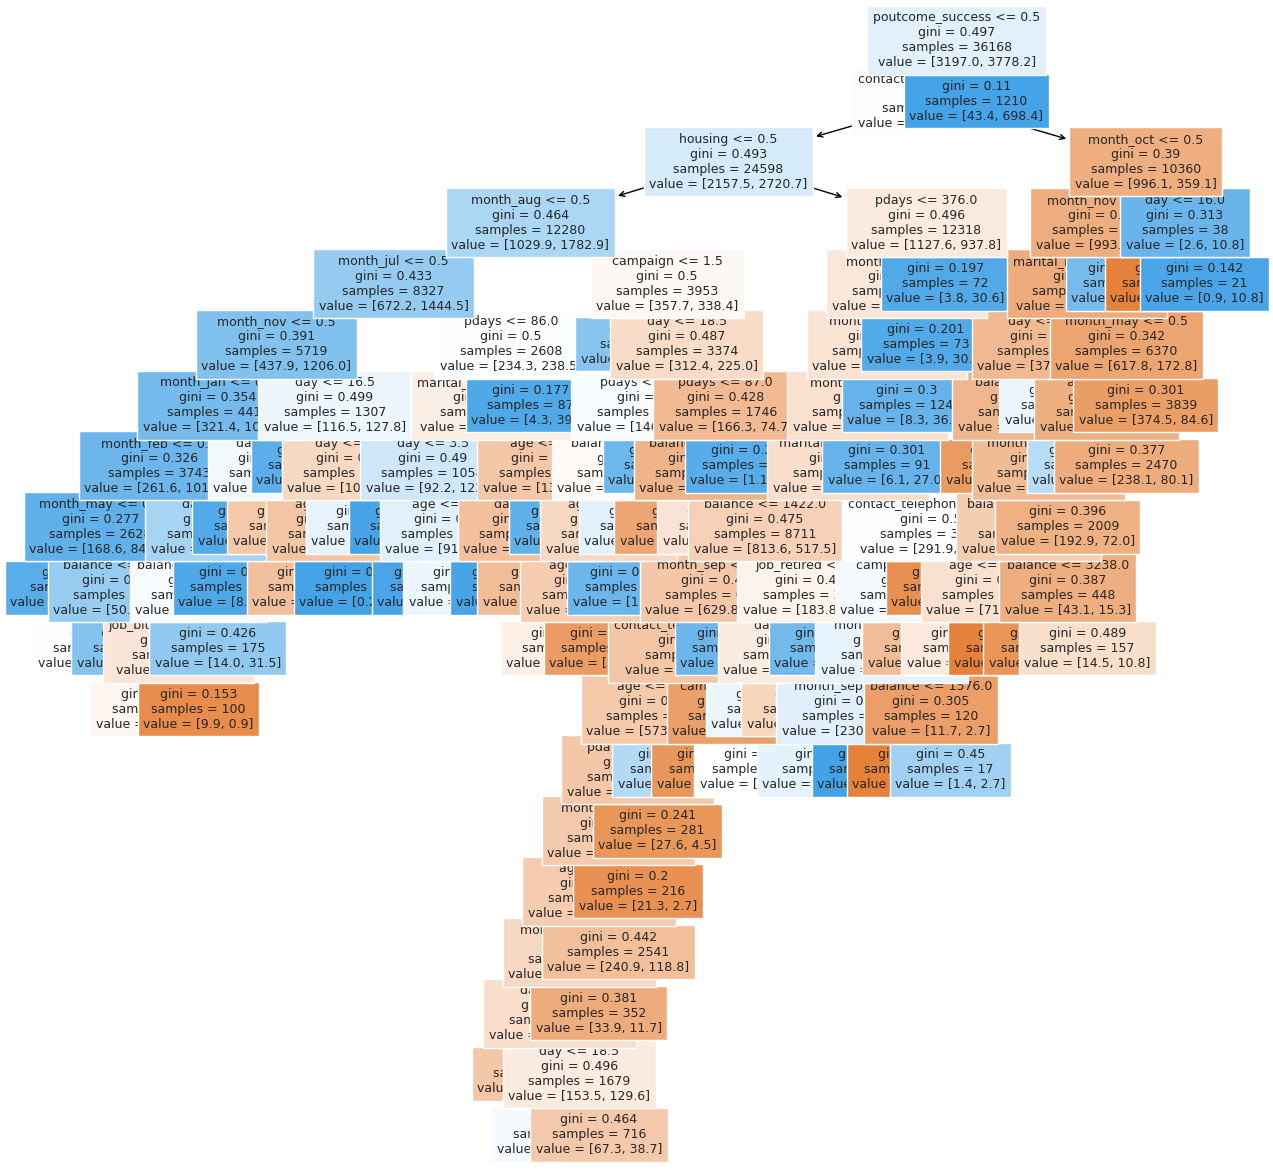

In [367]:
# Plot the best Decision Tree with post-pruning
plt.figure(figsize=(15,15))

out = tree.plot_tree(
    model_post_prune,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [368]:
print(tree.export_text(model_post_prune, feature_names = feature_names, show_weights = True))

|--- poutcome_success <= 0.50
|   |--- contact_unknown <= 0.50
|   |   |--- housing <= 0.50
|   |   |   |--- month_aug <= 0.50
|   |   |   |   |--- month_jul <= 0.50
|   |   |   |   |   |--- month_nov <= 0.50
|   |   |   |   |   |   |--- month_jan <= 0.50
|   |   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |   |--- month_may <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [118.00, 741.60] class: 1
|   |   |   |   |   |   |   |   |--- month_may >  0.50
|   |   |   |   |   |   |   |   |   |--- balance <= 229.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [16.00, 16.20] class: 1
|   |   |   |   |   |   |   |   |   |--- balance >  229.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [34.60, 90.00] class: 1
|   |   |   |   |   |   |   |--- month_feb >  0.50
|   |   |   |   |   |   |   |   |--- day <= 9.50
|   |   |   |   |   |   |   |   |   |--- balance <= 1814.00
|   |   |   |   |   |   |   |   |   |   |--- job_blue-collar <= 0.50
|   

In [369]:
# Importance of features in the tree building
importances_post_prune = model_post_prune.feature_importances_
indices_post_prune = np.argsort(importances_post_prune)

importances_post_prune

array([0.02715928, 0.        , 0.02986002, 0.07766872, 0.        ,
       0.08482312, 0.02800956, 0.04033835, 0.        , 0.00312103,
       0.        , 0.        , 0.        , 0.00316342, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01510159, 0.01068767, 0.        , 0.        , 0.        ,
       0.00922133, 0.18336073, 0.04071798, 0.        , 0.01545394,
       0.02443231, 0.03890715, 0.01328155, 0.01372466, 0.014221  ,
       0.03408667, 0.01807912, 0.00687555, 0.        , 0.26770527,
       0.        ])

#### Show Feature Importance

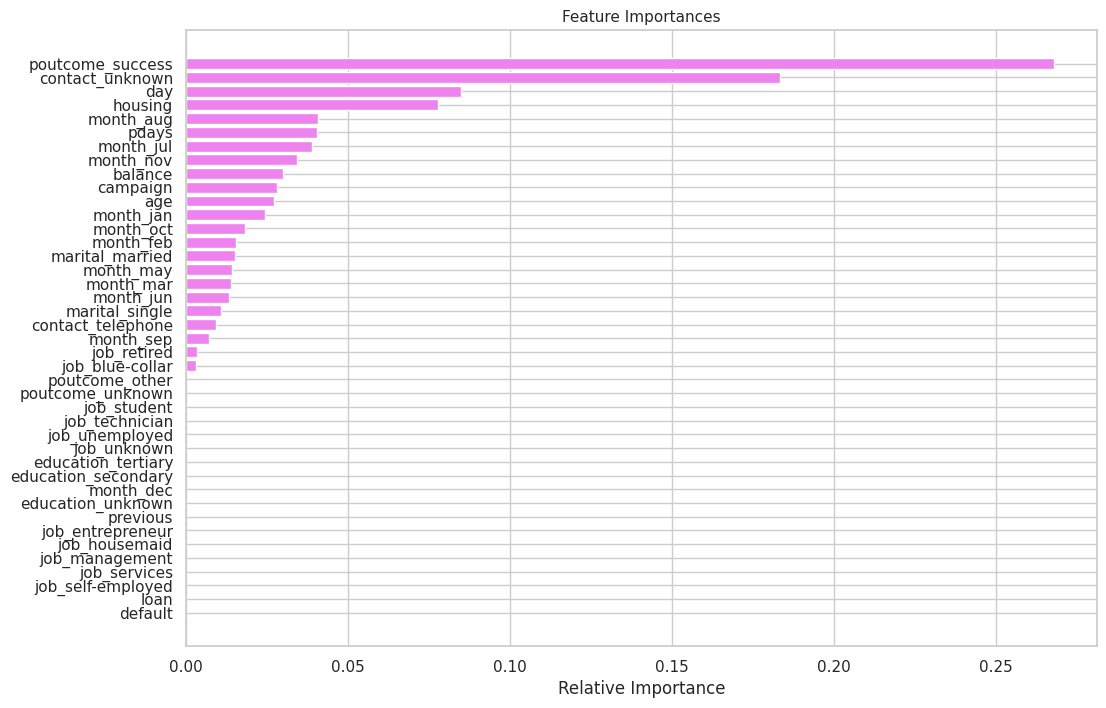

In [370]:
show_feature_importance(importances = importances_post_prune, indices = indices_post_prune, feature_names = feature_names)

#### Observation
* The model prediction is very similar to the Pre Prune model.
* Income is the primary feature used to split the data. The first split occurs at Income <= 98.50, indicating that income plays a significant role in determining the class.
* Just like pre pruned model, in this model Income, Education, Family, CC Average are also the most important features
* Pruning has simplified the tree, keeping only the most relevant features:
Income, CCAvg, CD_Account, Education, Family, and Experience


## Model Performance Comparison and Final Model Selection

### Model performance comparison on training sets

In [371]:
# training performance comparison

models_performace_compare = pd.concat(
    [
        decision_tree_training_performance.T,
        decision_tree_training_performance_class_weight.T,
        decision_tree_training_performance_pre_prune.T,
        decision_tree_training_performance_post_prune.T
    ],
    axis=1,
)
models_performace_compare.columns = [
    "Decision Tree (default)", "Decision Tree (class_weight = 'balanced')" ,
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_performace_compare

Training performance comparison:


,Decision Tree (default),Decision Tree (class_weight = 'balanced'),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.999945,0.999945,0.715826,0.705486
Recall,0.999524,1.000000,0.710100,0.752263
Precision,1.000000,0.999524,0.247550,0.247298
F1,0.999762,0.999762,0.367118,0.372230


### Model performance comparison on test sets

In [378]:
# test performance comparison

models_performace_compare = pd.concat(
    [
        decision_tree_test_performance.T,
        decision_tree_test_performance_class_weight.T,
        decision_tree_test_performance_pre_prune.T,
        decision_tree_test_performance_post_prune.T
    ],
    axis=1,
)
models_performace_compare.columns = [
    "Decision Tree (default)", "Decision Tree (class_weight = 'balanced')" ,
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_performace_compare

Test performance comparison:


,Decision Tree (default),Decision Tree (class_weight = 'balanced'),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.826827,0.831361,0.705850,0.690700
Recall,0.315307,0.294225,0.679193,0.703025
Precision,0.295787,0.298327,0.242871,0.236728
F1,0.305235,0.296262,0.357798,0.354191


### Observation
* The Decision Tree models, both with pre-pruning and post-pruning, are achieving high recall scores on the training and test sets.
* Pre Prune and Post Prune comparison shows that Post Prune model has higher recall with almost similar Accuracy..
* Decision Tree model with post-pruning will be the preffered model since its overall performs better than Pre Prune model.

In [379]:
import joblib

# Save the trained post-pruned model
joblib.dump(model_post_prune, 'post_pruned_model.pkl')

['post_pruned_model.pkl']